# Time-dependent parameters estimation

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Estimation from SIRD equations

In [2]:
# Function to estimate mu parameter
def mu_est(D_after, D_t, I_t):
    if I_t > 0:
        mu = (D_after - D_t)/(I_t)
    if I_t == 0:
        mu = 0
    return (mu)

In [3]:
# Function to estimate beta parameter
def beta_est(I_after, I_t, S_t, N_t, R_after, R_t, D_after, D_t):
    den = (I_t * S_t)/(N_t)
    num = ((I_after - I_t) + (R_after - R_t) + (D_after - D_t))
    if I_t > 0:
        beta = num/den
    if I_t == 0:
        beta = 0
    return (beta)

In [4]:
# Function to estimate mu parameter
def gamma_est(R_after, R_t, I_t):
    if I_t > 0:
        gamma = (R_after - R_t)/(I_t)
    if I_t == 0:
        gamma = 0
    return (gamma)

In [5]:
# Reading file with SIRD data
df = pd.read_csv('SIRD(Raw)_Spain.csv')
df.head()

,ISO_code,Continent,Country/Region,Date,Susceptibles Raw (S),Infected Raw (I),Recovered Raw (R),Deaths Raw (D),Total Population (N),Total Population Without Deahts (N Alive)
0,ESP,Europe,Spain,2020-01-28,47332614,0,0,0,47332614,47332614
1,ESP,Europe,Spain,2020-01-29,47332614,0,0,0,47332614,47332614
2,ESP,Europe,Spain,2020-01-30,47332614,0,0,0,47332614,47332614
3,ESP,Europe,Spain,2020-01-31,47332614,0,0,0,47332614,47332614
4,ESP,Europe,Spain,2020-02-01,47332613,1,0,0,47332614,47332614


In [6]:
# Extracting the values of S, I, D, N
S = df.values[:, 4]
I = df.values[:, 5]
R = df.values[:, 6]
D = df.values[:, 7]
N = df.values[:, 8]

S[0:5], I[0:5], D[0:5], N[0:5]

(array([47332614, 47332614, 47332614, 47332614, 47332613], dtype=object),
 array([0, 0, 0, 0, 1], dtype=object),
 array([0, 0, 0, 0, 0], dtype=object),
 array([47332614, 47332614, 47332614, 47332614, 47332614], dtype=object))

In [7]:
# Estimating mu parameters
mu_raw = np.empty(len(S)-1, dtype = object)

for i in range(0, len(S)-1, 1):
    mu_raw[i] = mu_est(D[i+1], D[i], I[i])

mu_raw.shape, mu_raw

((786,),
 array([0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.00847457627118644, 0.006172839506172839,
        0.0045871559633027525, 0.007874015748031496, 0.01272264631043257,
        0.014344262295081968, 0.016819571865443424, 0.006711409395973154,
        0.011487303506650543, 0.00045248868778280545, 0.035342093339374714,
        0.012236037102822183, 0.015282067956429848, 0.007138047138047138,
        0.020147679324894516, 0.008144059361143787, 0.015841432616514883,
        0.012620726432422824, 0.017499472907442547, 0.016887149602279976,
        0.020463173880030373, 0.01563876651982379, 0.02368918880763475,
        0.016450910757245963, 0.015097951131858044, 0.015212140874517862,
        0.013446451676302472, 0.013875801696100186, 0.01058890147225368,
        0.012105870625885315, 0.011799518687687246, 0.010049181878369432,
        0.00845048175643658

In [8]:
# Calculate mu smooth (7 days average)
mu_smooth = np.empty(len(mu_raw)-6, dtype = object)

for i in range(0, len(mu_smooth), 1):
    sum_mu = 0
    for j in range(i, i+7):
        sum_mu = sum_mu + mu_raw[j]
    mu_smooth[i] = (sum_mu/7)

mu_smooth.shape, mu_smooth

((780,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0012106537530266344, 0.002092487968194183,
        0.0027477959629517187, 0.003872655355527647, 0.0056901762570180136,
        0.007739356584886866, 0.0101421525656645, 0.009890271583491173,
        0.010649480726416558, 0.01005881397277085, 0.013982825057248455,
        0.013913309456161257, 0.014047281693496668, 0.012664206732440054,
        0.014583673865143107, 0.014106067558642143, 0.016304488119889583,
        0.013058578561753598, 0.01381049796241365, 0.014039795340392238,
        0.01594338487496127, 0.015299254474236882, 0.01751998725230702,
        0.017607055558125747, 0.017960944800902205, 0.017634183081912967,
        0.01714265480677332, 0.01620160163764044, 0.015480192345130423,
        0.013825432604880504, 0.013160948023514973, 0.0124396952730166,
        0.01147374397043356, 0.010651699041354873,

In [9]:
# Estimating beta parameters
beta_raw = np.empty(len(S)-1, dtype = object)

gamma = 1/(14.4)
for i in range(0, len(S)-1, 1):
    beta_raw[i] = beta_est(I[i+1], I[i], S[i], N[i], R[i+1], R[i], D[i+1], D[i])

beta_raw.shape, beta_raw

((786,),
 array([0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.000000021127082,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0, 0, 1.7500002218343853, 0.18181823175493395,
        1.307692722108271, 0.4333336262957301, 0.9069776064665935,
        0.43902516937083225, 0.38135689903839043, 0.3518530784005892,
        0.16972556669111233, 0.5551211478114806, 0.2544550765659215,
        0.3545119416226772, 0.6116294915768258, 0.5963701828002866,
        0.3518868454662258, 0.0, 1.3389860267997682, 0.22876023809344792,
        0.22877418359085058, 0.2888017885550444, 0.1905463525074478,
        0.19568697345806912, 0.31026183794881856, 0.14504526889701583,
        0.2617616181074299, 0.14444767648799495, 0.24190860750015883,
        0.14954461617154452, 0.2721326368228237, 0.18970469505022036,
        0.15513382757038047, 0.13565571004561666, 0.11277419086260262,
        0.11944590707467782, 0.11299309553349819, 0.10770213382504583,
        0.0977

In [10]:
# Estimating beta parameters (beta fixed)
beta_raw_fix = np.empty(len(beta_raw), dtype = object)

for i in range(0, len(beta_raw)):
    if beta_raw[i] >= 0:
        beta_raw_fix[i] = beta_raw[i]
    if beta_raw[i] < 0:
        beta_raw_fix[i] = 0

beta_raw_fix.shape, beta_raw_fix

((786,),
 array([0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.000000021127082,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0, 0, 1.7500002218343853, 0.18181823175493395,
        1.307692722108271, 0.4333336262957301, 0.9069776064665935,
        0.43902516937083225, 0.38135689903839043, 0.3518530784005892,
        0.16972556669111233, 0.5551211478114806, 0.2544550765659215,
        0.3545119416226772, 0.6116294915768258, 0.5963701828002866,
        0.3518868454662258, 0.0, 1.3389860267997682, 0.22876023809344792,
        0.22877418359085058, 0.2888017885550444, 0.1905463525074478,
        0.19568697345806912, 0.31026183794881856, 0.14504526889701583,
        0.2617616181074299, 0.14444767648799495, 0.24190860750015883,
        0.14954461617154452, 0.2721326368228237, 0.18970469505022036,
        0.15513382757038047, 0.13565571004561666, 0.11277419086260262,
        0.11944590707467782, 0.11299309553349819, 0.10770213382504583,
        0.0977

In [11]:
# Calculate beta smooth (7 days average)
beta_smooth = np.empty(len(beta_raw)-6, dtype = object)
beta_smooth_fix = np.empty(len(beta_raw)-6, dtype = object)

for i in range(0, len(beta_smooth), 1):
    sum_beta = 0
    sum_beta_fix = 0
    for j in range(i, i+7):
        sum_beta = sum_beta + beta_raw[j]
        sum_beta_fix = sum_beta_fix + beta_raw_fix[j]
    beta_smooth[i] = (sum_beta/7)
    beta_smooth_fix[i] = (sum_beta_fix/7)

beta_smooth.shape, beta_smooth

((780,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714587529744, 0.14285714587529744,
        0.14285714587529744, 0.14285714587529744, 0.14285714587529744,
        0.14285714587529744, 0.14285714587529744, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.25000003169062646, 0.2759740647984742,
        0.4627873108139414, 0.5246921145704743, 0.654260344065702,
        0.7169782254043923, 0.7714577824098766, 0.5717224762050487,
        0.5699949526245028, 0.46248472772496124, 0.4369306491921314,
        0.35800698278585763, 0.38266474310099957, 0.4133809264955562,
        0.41338575036207575, 0.38913924083477397, 0.5011199378331008,
        0.4974492466227474, 0.4794867097610579, 0.4333684664722319,
        0.375393633573255, 0.3530793661435183, 0.39740248585049237,
        0.22683952043581343, 0.23155400329495374, 0.21950735942311722,
        0.2128083335581336, 0.20695094265300454, 0.21787175170511233,
        0.2006493027195983, 0.2020905253872218, 0.18407539566410563,
      

In [12]:
# Estimating gamma parameters
gamma_raw = np.empty(len(S)-1, dtype = object)

for i in range(0, len(S)-1, 1):
    gamma_raw[i] = mu_est(R[i+1], R[i], I[i])

gamma_raw.shape, gamma_raw

((786,),
 array([0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.003835091083413231, 0.004232164449818622, 0.0009049773755656109,
        0.007702763932940644, 0.0025656206828498125, 0.006340432450008129,
        0.0048484848484848485, 0.004641350210970464, 0.005067414713600579,
        0.002755031759393893, 0.008236060911299402, 0.005007379295804343,
        0.007061125526394147, 0.014768413059984813, 0.01935179358086847,
        0.01589632097580258, -2.2912131973880168e-05, 0.05619250375983906,
        0.01977217836415414, 0.021504495799007484, 0.03177908143104654,
        0.022862400906002264, 0.027175908923980904, 0.047222631501399735,
        0.02641161448973801, 0.05225985513459846, 0.03321806211345348,
        0.06335249812518341, 0.046978753494127654, 0.0967958599427439,
        0.08626084970306076, 0.08488038

In [13]:
# Calculate gamma smooth (7 days average)
gamma_smooth = np.empty(len(gamma_raw)-6, dtype = object)

for i in range(0, len(gamma_smooth), 1):
    sum_gamma = 0
    for j in range(i, i+7):
        sum_gamma = sum_gamma + gamma_raw[j]
    gamma_smooth[i] = (sum_gamma/7)

gamma_smooth.shape, gamma_smooth

((780,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
        0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
        0.07142857142857142, 0.0, 0.14285714285714285, 0.14285714285714285,
        0.14285714285714285, 0.14285714285714285, 0.14285714285714285,
        0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0005478701547733187, 0.001152465076175979,
        0.0012817475583996377, 0.0023821424059625868,
        0.0027486596463697026, 0.0036544357106565784, 0.004347076403297271,
        0.00446225627866259, 0.004581577744917155, 0.004845871228321196,
        0.004922056510943876, 0.00527087916993738, 0.005373835323706811,
        0.0067909679253496625, 0.008892459835335093, 0.010439446444221094,
        0.01004259731688284, 0.016893517723817076, 0.01900277473358133,
        0.021066113343954664, 0.023496208825534916, 0.02399772415769

In [14]:
# Estimating R0 values
R0_raw = np.empty(len(beta_raw), dtype = object)
R0_raw_fix = np.empty(len(beta_raw), dtype = object)
R0_smooth = np.empty(len(beta_smooth), dtype = object)
R0_smooth_fix = np.empty(len(beta_smooth), dtype = object)

for i in range(len(beta_raw)):
    if(gamma_raw[i] == 0):
        R0_raw[i] = 0
        R0_raw_fix[i] = 0
    else:
        R0_raw[i] = beta_raw[i]/(gamma_raw[i])
        R0_raw_fix[i] = beta_raw_fix[i]/(gamma_raw[i])

for i in range(len(beta_smooth)):
    if(gamma_smooth[i] == 0):
        R0_smooth[i] = 0
        R0_smooth_fix[i] = 0
    else:
        R0_smooth[i] = beta_smooth[i]/(gamma_smooth[i])
        R0_smooth_fix[i] = beta_smooth_fix[i]/(gamma_smooth[i])

R0_smooth.shape, R0_smooth

((780,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.000000042254164, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 1.7500002218343853,
        1.9318184535893195, 3.23951117569759, 3.67284480199332, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 754.5235360860139, 358.69698692626815,
        303.6005321676952, 210.36523113764312, 180.97884446324755,
        131.2067710926868, 99.69193689430455, 84.12641724956383,
        77.0650168569611, 82.00847012357951, 46.08632995810803,
        43.93081226669529, 40.84742948016195, 31.336966379085975,
        23.272631699798513, 20.870048318100082, 19.979821592794742,
        11.96260771090366, 9.686764077606583, 8.523195953223182,
        6.897110155824956, 6.535382008641166, 5.206909059603689,
        3.7150642166465637, 3.9186263964243224, 3.115289947349682,
        2.7484351174355606, 2.1927962049859184, 1.8303325901361553,
        1.3776336359590127, 1.1450381121314308, 0.9479082119052692,
        0.8499127860389876, 0.7577884258864986, 0.6998

In [15]:
# Arrays which will form the final dataframe
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['ESP', 'ESP', 'ESP', 'ESP', 'ESP'], dtype=object),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe'], dtype=object),
 array(['Spain', 'Spain', 'Spain', 'Spain', 'Spain'], dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [16]:
# Adjusting arrays: Last value is not available, 6 first values are lost when smoothing

iso_code = iso_code[6:len(iso_code)-1]
continent = continent[6:len(continent)-1]
region = region[6:len(region)-1]
dates = dates[6:len(dates)-1]

len(dates), len(region), len(continent), len(iso_code), len(mu_smooth), len(beta_smooth), len(R0_smooth)

(780, 780, 780, 780, 780, 780, 780)

In [17]:
# Array concatenation for building the final dataframe

columns = 16  # Number of columns
X_total = np.empty((len(beta_smooth), columns), dtype = object)

for i in range(len(beta_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i], mu_raw[i], mu_smooth[i], beta_raw[i], beta_smooth[i],
                  beta_raw_fix[i], beta_smooth_fix[i], gamma_raw[i], gamma_smooth[i],
                  R0_raw[i], R0_smooth[i], R0_raw_fix[i], R0_smooth_fix[i]]
    
X_total.shape, X_total[0:10]

((780, 16),
 array([['ESP', 'Europe', 'Spain', '2020-02-03', 0, 0.0, 0, 0.0, 0, 0.0,
         0, 0.0, 0, 0, 0, 0],
        ['ESP', 'Europe', 'Spain', '2020-02-04', 0, 0.0, 0, 0.0, 0, 0.0,
         0, 0.0, 0, 0, 0, 0],
        ['ESP', 'Europe', 'Spain', '2020-02-05', 0, 0.0, 0, 0.0, 0, 0.0,
         0, 0.0, 0, 0, 0, 0],
        ['ESP', 'Europe', 'Spain', '2020-02-06', 0, 0.0, 0, 0.0, 0, 0.0,
         0, 0.0, 0, 0, 0, 0],
        ['ESP', 'Europe', 'Spain', '2020-02-07', 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0, 0, 0, 0],
        ['ESP', 'Europe', 'Spain', '2020-02-08', 0.0, 0.0, 0.0,
         0.14285714587529744, 0.0, 0.14285714587529744, 0.0, 0.0, 0, 0, 0,
         0],
        ['ESP', 'Europe', 'Spain', '2020-02-09', 0.0, 0.0, 0.0,
         0.14285714587529744, 0.0, 0.14285714587529744, 0.0, 0.0, 0, 0, 0,
         0],
        ['ESP', 'Europe', 'Spain', '2020-02-10', 0.0, 0.0, 0.0,
         0.14285714587529744, 0.0, 0.14285714587529744, 0.0, 0.0, 0, 0, 0,
         0],
        [

In [18]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Mu Raw', 'Mu Smooth (7 days average)', 'Beta Raw',
          'Beta Smooth (7 days average)', 'Beta Fixed Raw (No negative values)', 'Beta Fixed Smooth',
          'Gamma Raw', 'Gamma Smooth (7 days average)',
          'R0 Raw', 'R0 Smooth (7 days average)', 'R0 Fixed Raw (No negative values)', 'R0 Fixed Smooth']

In [19]:
# Creation of the final dataframe
df_parameters = pd.DataFrame(data=X_total, columns=labels)
df_parameters

,ISO_code,Continent,Country/Region,Date,Mu Raw,Mu Smooth (7 days average),Beta Raw,Beta Smooth (7 days average),Beta Fixed Raw (No negative values),Beta Fixed Smooth,Gamma Raw,Gamma Smooth (7 days average),R0 Raw,R0 Smooth (7 days average),R0 Fixed Raw (No negative values),R0 Fixed Smooth
0,ESP,Europe,Spain,2020-02-03,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0
1,ESP,Europe,Spain,2020-02-04,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0
2,ESP,Europe,Spain,2020-02-05,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0
3,ESP,Europe,Spain,2020-02-06,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0
4,ESP,Europe,Spain,2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,ESP,Europe,Spain,2022-03-19,0.0,0.000391,0.0,0.09478,0.0,0.09478,0.0,0.079526,0,1.191822,0,1.191822
776,ESP,Europe,Spain,2022-03-20,0.001148,0.000391,0.193638,0.09478,0.193638,0.09478,0.23736,0.102491,0.815798,0.924767,0.815798,0.924767
777,ESP,Europe,Spain,2022-03-21,0.0,0.000494,0.0,0.121597,0.0,0.121597,0.083845,0.086041,0.0,1.413234,0.0,1.413234
778,ESP,Europe,Spain,2022-03-22,0.0,0.000494,0.0,0.121597,0.0,0.121597,0.112566,0.08835,0.0,1.376303,0.0,1.376303


In [20]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Parameters_ODEs.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_parameters.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Beta')

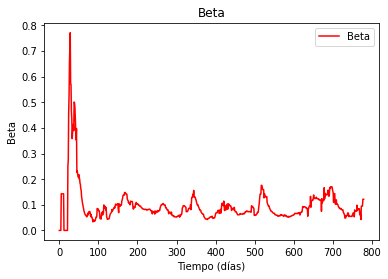

In [21]:
plt.plot(range(0, len(beta_smooth)), beta_smooth[0:len(beta_smooth)], 'r', label="Beta")
plt.xlabel("Tiempo (días)")
plt.ylabel("Beta")
plt.legend()

plt.title("Beta")

Text(0.5, 1.0, 'Beta Fixed')

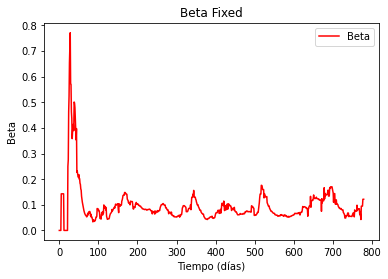

In [22]:
plt.plot(range(0, len(beta_smooth_fix)), beta_smooth_fix[0:len(beta_smooth_fix)], 'r', label="Beta")
plt.xlabel("Tiempo (días)")
plt.ylabel("Beta")
plt.legend()

plt.title("Beta Fixed")

Text(0.5, 1.0, 'R0')

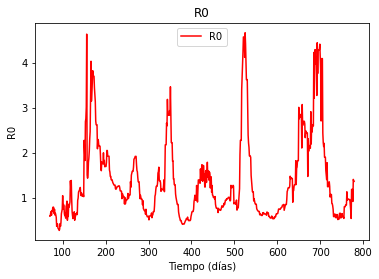

In [23]:
plt.plot(range(70, len(R0_smooth)), R0_smooth[70:len(R0_smooth)], 'r', label="R0")
plt.xlabel("Tiempo (días)")
plt.ylabel("R0")
plt.legend()

plt.title("R0")

Text(0.5, 1.0, 'R0 Fixed')

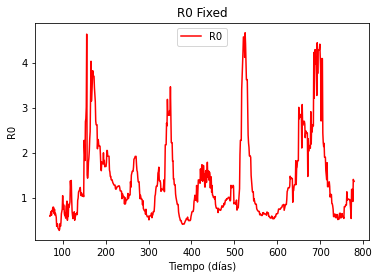

In [24]:
plt.plot(range(70, len(R0_smooth_fix)), R0_smooth_fix[70:len(R0_smooth_fix)], 'r', label="R0")
plt.xlabel("Tiempo (días)")
plt.ylabel("R0")
plt.legend()

plt.title("R0 Fixed")

Text(0.5, 1.0, 'Mu')

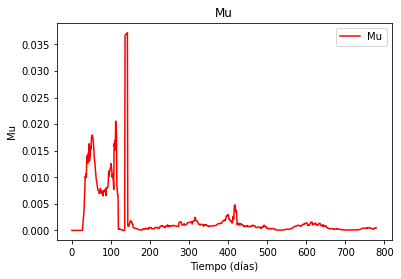

In [25]:
plt.plot(range(0, len(mu_smooth)), mu_smooth, 'r', label="Mu")
plt.xlabel("Tiempo (días)")
plt.ylabel("Mu")
plt.legend()

plt.title("Mu")

Text(0.5, 1.0, 'Gamma')

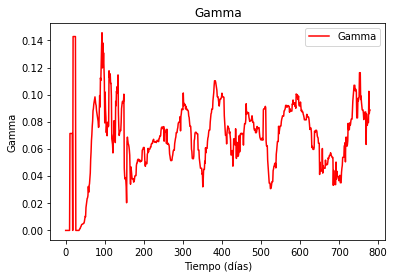

In [26]:
plt.plot(range(0, len(gamma_smooth)), gamma_smooth, 'r', label="Gamma")
plt.xlabel("Tiempo (días)")
plt.ylabel("Gamma")
plt.legend()

plt.title("Gamma")